In [120]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import missingno as msno # missing values
%matplotlib inline

# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123

In [59]:
filename = "dataset_v1.csv"
df = pd.read_csv(filename)
# #df = df.dropna(subset=['host_is_superhost', 'bedrooms', 'bathrooms',
#                        'beds', 'review_scores_accuracy',
#                        'review_scores_cleanliness', 'review_scores_checkin',
#                        'review_scores_location', 'review_scores_value'])
df.isnull().sum()

id                                 0
host_is_superhost                  0
property_type                      0
room_type                          0
price                              0
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
reviews_per_month                  4
review_scores_rating               4
review_scores_accuracy             9
review_scores_cleanliness          8
review_scores_checkin             34
review_scores_communication       14
review_scores_location            35
review_scores_value               40
calculated_host_listings_count     0
availability_365                   0
beds                              14
bed_type                           0
bedrooms                           4
bathrooms                          6
accommodates                       0
TV                                 0
Wifi                               0
F

In [60]:
df.columns

Index(['id', 'host_is_superhost', 'property_type', 'room_type', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'availability_365', 'beds',
       'bed_type', 'bedrooms', 'bathrooms', 'accommodates', 'TV', 'Wifi',
       'Free street parking', 'Kitchen', 'Shampoo', 'Air conditioning',
       'Hair dryer', 'Self check-in', 'room_type_1', 'property_type_1',
       'bed_type_1'],
      dtype='object')

In [61]:
df.dtypes

id                                  int64
host_is_superhost                   int64
property_type                      object
room_type                          object
price                               int64
guests_included                     int64
extra_people                        int64
minimum_nights                      int64
maximum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
calculated_host_listings_count      int64
availability_365                    int64
beds                              float64
bed_type                           object
bedrooms                          float64
bathrooms                         

In [62]:
# first glance at the data itself
print('Total size:', df.shape)
df.head(5).append(df.tail(5))

Total size: (22644, 36)


id  host_is_superhost property_type        room_type  price  \
0         12351                  0     Townhouse     Private room    100   
1         14250                  0         House  Entire home/apt    471   
2         15253                  0     Apartment     Private room    109   
3         20865                  1         House  Entire home/apt    450   
4         26174                  0     Apartment     Private room     62   
22639  29442472                  1     Apartment  Entire home/apt    179   
22640  29442523                  1          Loft  Entire home/apt    174   
22641  29442546                  0         House     Private room     50   
22642  29442558                  0     Apartment  Entire home/apt    195   
22643  29446814                  0     Apartment  Entire home/apt    130   

       guests_included  extra_people  minimum_nights  maximum_nights  \
0                    2           395               2               7   
1                    6            40               5              22   
2                    1            10               2               7   
3                    6             0               7             365   
4                    1            15               1              60   
22639                1             0               1            1125   
22640                1             0               1            1125   
22641                1            18               1            1125   
22642                1             0               1            1125   
22643                1             0               3            1125   

       number_of_reviews  ...  Wifi  Free street parking  Kitchen  Shampoo  \
0                    493  ...     1                    0        0        1   
1                      1  ...     1                    1        1        1   
2                    300  ...     1                    1        1        1   
3                     15  ...     1                    0        1        1   
4                     42  ...     1                    1        1        0   
22639                  4  ...     1                    0        1        1   
22640                  5  ...     1                    0        1        1   
22641                  3  ...     1                    0        1        1   
22642                  2  ...     1                    0        1        1   
22643                  1  ...     0                    0        1        0   

       Air conditioning  Hair dryer  Self check-in  room_type_1  \
0                     1           1              0            0   
1                     1           1              0            1   
2                     1           1              1            0   
3                     1           1              0            1   
4                     0           1              0            0   
22639                 1           1              0            1   
22640                 0           1              1            1   
22641                 1           0              0            0   
22642                 1           1              1            1   
22643                 0           0              0            1   

       property_type_1  bed_type_1  
0                    0           0  
1                    1           0  
2                    2           0  
3                    1           0  
4                    2           0  
22639                2           0  
22640                4           0  
22641                1           0  
22642                2           0  
22643                2           0  

[10 rows x 36 columns]

In [63]:
df.describe()

id  host_is_superhost         price  guests_included  \
count  2.264400e+04       22644.000000  22644.000000     22644.000000   
mean   1.654931e+07           0.180224    183.871003         1.670332   
std    7.896209e+06           0.384383    220.624767         1.378827   
min    1.235100e+04           0.000000      0.000000         1.000000   
25%    9.912084e+06           0.000000     80.000000         1.000000   
50%    1.760188e+07           0.000000    130.000000         1.000000   
75%    2.248453e+07           0.000000    199.000000         2.000000   
max    2.944681e+07           1.000000  10001.000000        16.000000   

       extra_people  minimum_nights  maximum_nights  number_of_reviews  \
count  22644.000000    22644.000000    22644.000000       22644.000000   
mean      13.212639        4.224828      682.165033          19.381028   
std       23.708109       14.035419      546.949293          34.229915   
min        0.000000        1.000000        1.000000           0.000000   
25%        0.000000        1.000000       30.000000           2.000000   
50%        0.000000        2.000000     1125.000000           6.000000   
75%       20.000000        4.000000     1125.000000          20.000000   
max      410.000000      700.000000    10000.000000         493.000000   

       reviews_per_month  review_scores_rating  ...          Wifi  \
count       22640.000000          22640.000000  ...  22644.000000   
mean            1.155476             93.464664  ...      0.940205   
std             1.549142              9.550227  ...      0.237112   
min             0.010000             20.000000  ...      0.000000   
25%             0.150000             91.000000  ...      1.000000   
50%             0.490000             96.000000  ...      1.000000   
75%             1.570000            100.000000  ...      1.000000   
max            15.180000            100.000000  ...      1.000000   

       Free street parking       Kitchen       Shampoo  Air conditioning  \
count         22644.000000  22644.000000  22644.000000      22644.000000   
mean              0.306792      0.949567      0.728979          0.450936   
std               0.461173      0.218841      0.444497          0.497598   
min               0.000000      0.000000      0.000000          0.000000   
25%               0.000000      1.000000      0.000000          0.000000   
50%               0.000000      1.000000      1.000000          0.000000   
75%               1.000000      1.000000      1.000000          1.000000   
max               1.000000      1.000000      1.000000          1.000000   

         Hair dryer  Self check-in   room_type_1  property_type_1  \
count  22644.000000   22644.000000  22644.000000     22644.000000   
mean       0.710078       0.274731      0.677751         2.319113   
std        0.453736       0.446388      0.491124         2.639778   
min        0.000000       0.000000      0.000000         0.000000   
25%        0.000000       0.000000      0.000000         1.000000   
50%        1.000000       0.000000      1.000000         2.000000   
75%        1.000000       1.000000      1.000000         2.000000   
max        1.000000       1.000000      2.000000        35.000000   

         bed_type_1  
count  22644.000000  
mean       0.011350  
std        0.160334  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 33 columns]

## The table above can tell some important things:
- **1**: we have different units of data(int, float, object)
- **2**: some datapoints are missing
- **3**: some variables' distributions are skewed.


## Missing values
- in this section, the main task is treating missing values.

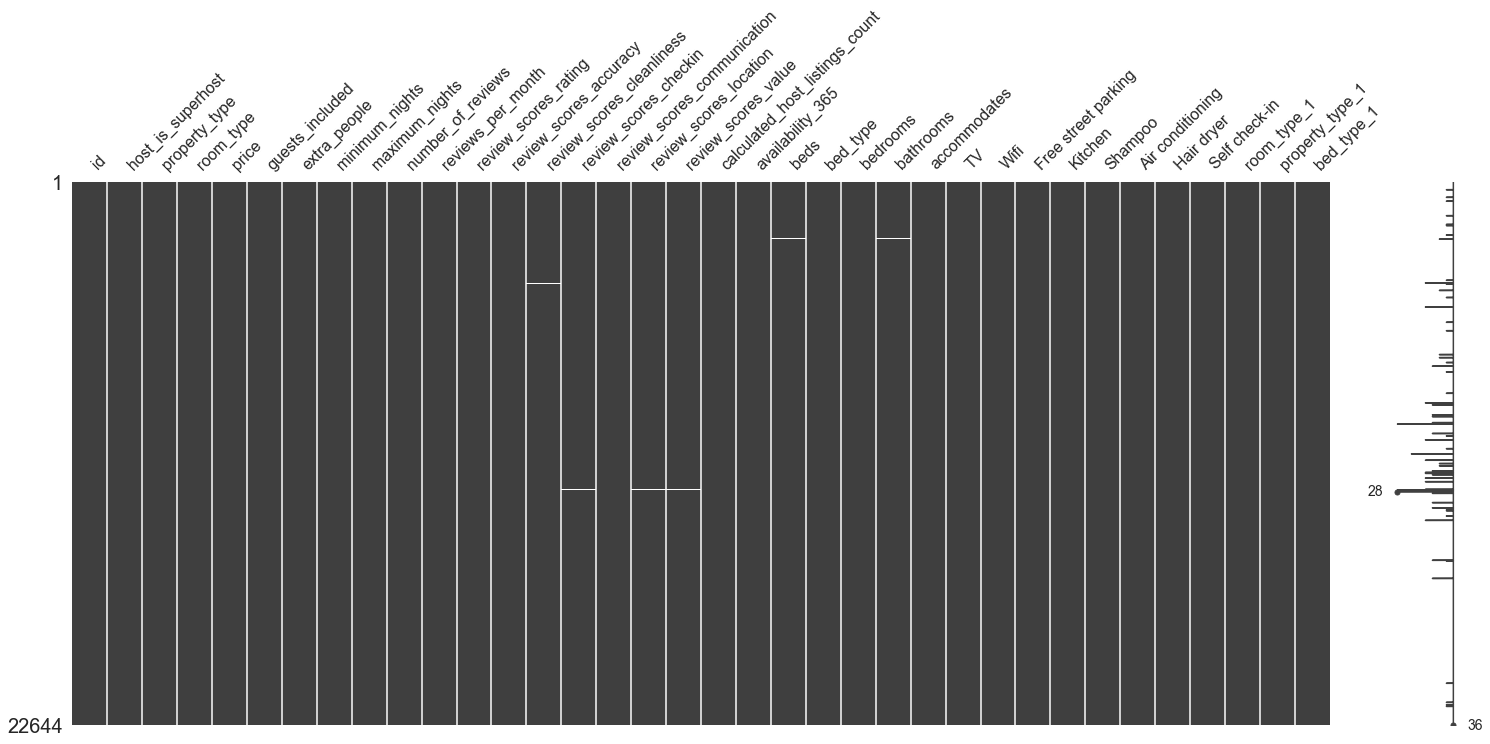

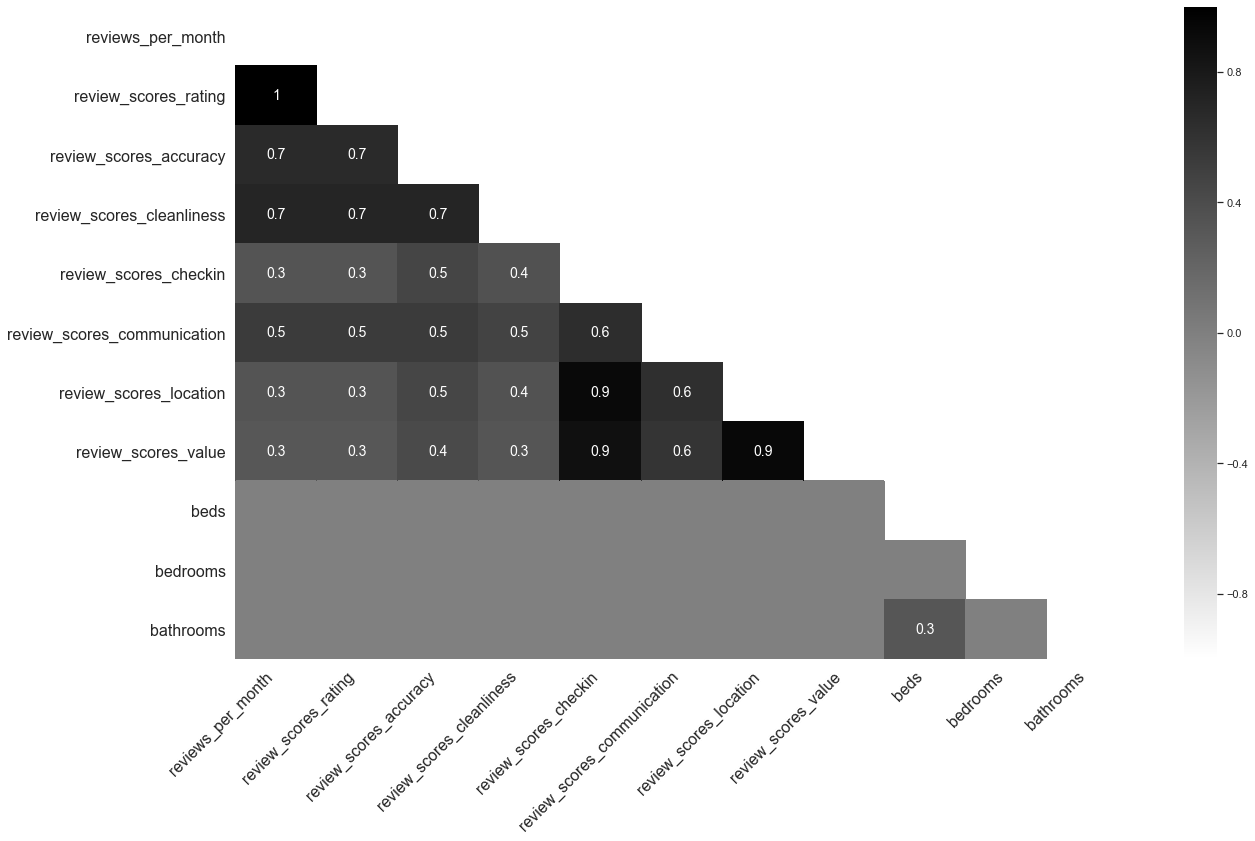

In [64]:
seed = 123
sns.set(style = "ticks")

msno.matrix(df)
msno.heatmap(df, cmap = 'binary')

More or less clean dataset with occasional missing values. 
- thought on dealing with the missing values is replaced by their grouped medians

In [65]:
# missing values in reviews_score_value
df[pd.isnull(df['review_scores_value'])].head()

id  host_is_superhost property_type        room_type  price  \
4215   8356300                  0     Apartment  Entire home/apt    136   
4823   9215747                  0     Apartment  Entire home/apt    150   
5220   9583063                  0     Apartment  Entire home/apt    275   
7201  12762013                  0         House  Entire home/apt    496   
7532  13318796                  0     Apartment      Shared room    100   

      guests_included  extra_people  minimum_nights  maximum_nights  \
4215                1             0               7            1125   
4823                1             0               1            1125   
5220                1             0               7            1125   
7201                1             0               5             200   
7532                1             0               2              26   

      number_of_reviews  ...  Wifi  Free street parking  Kitchen  Shampoo  \
4215                  1  ...     1                    0        1        0   
4823                  1  ...     0                    0        1        0   
5220                  1  ...     1                    0        1        1   
7201                  1  ...     1                    0        1        0   
7532                  1  ...     1                    0        1        0   

      Air conditioning  Hair dryer  Self check-in  room_type_1  \
4215                 0           0              0            1   
4823                 1           0              0            1   
5220                 0           1              0            1   
7201                 0           1              1            1   
7532                 0           1              0            2   

      property_type_1  bed_type_1  
4215                2           0  
4823                2           0  
5220                2           0  
7201                1           0  
7532                2           1  

[5 rows x 36 columns]

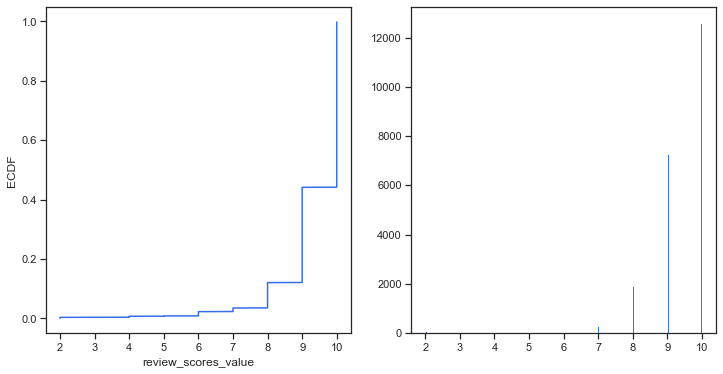

In [66]:
sns.set(style = "ticks")
plt.figure(figsize = (12, 6)) 
c = '#366DE8'

# ECDF
plt.subplot(121)
cdf = ECDF(df['review_scores_value'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('review_scores_value'); plt.ylabel('ECDF');

# overall distribution
plt.subplot(122)
plt.hist(df['review_scores_value'].dropna(), 
         bins = int(np.sqrt(len(df['review_scores_value']))),
         color = c);

- seems these missing data would effect little

In [67]:
df.groupby('review_scores_checkin')['review_scores_value'].describe()

count      mean       std  min   25%   50%    75%  \
review_scores_checkin                                                        
2.0                       57.0  3.578947  2.528038  2.0  2.00   2.0   6.00   
3.0                        2.0  3.500000  0.707107  3.0  3.25   3.5   3.75   
4.0                       38.0  6.105263  2.227463  2.0  4.00   6.0   8.00   
5.0                       18.0  6.111111  1.967049  2.0  5.25   7.0   7.00   
6.0                      162.0  7.067901  2.097400  2.0  6.00   7.0   8.00   
7.0                      117.0  7.837607  1.413953  3.0  7.00   8.0   9.00   
8.0                      763.0  8.212320  1.623969  2.0  8.00   8.0   9.00   
9.0                     2729.0  8.924881  0.761905  4.0  9.00   9.0   9.00   
10.0                   18716.0  9.520624  0.789357  2.0  9.00  10.0  10.00   

                        max  
review_scores_checkin        
2.0                    10.0  
3.0                     4.0  
4.0                    10.0  
5.0                     9.0  
6.0                    10.0  
7.0                    10.0  
8.0                    10.0  
9.0                    10.0  
10.0                   10.0

In [68]:
df1 = df.dropna(subset=['host_is_superhost', 'bedrooms', 'bathrooms',
                       'beds', 'review_scores_accuracy',
                       'review_scores_cleanliness', 'review_scores_checkin',
                       'review_scores_location', 'review_scores_value'])
df1 = df1.drop(['id'],axis = 1)

In [69]:
df1.isnull().sum()

host_is_superhost                 0
property_type                     0
room_type                         0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_count    0
availability_365                  0
beds                              0
bed_type                          0
bedrooms                          0
bathrooms                         0
accommodates                      0
TV                                0
Wifi                              0
Free street parking               0
Kitchen                     

## feature selection and correlations
- Before encoding classes into numeric values, we can drop few highly correlated to the target variables. We do that in order to avoid large features weights in the model building.

- Data selection (dropping features)(Probably PCA is a better choice, we will do it if having more time)

In [70]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(df1, 20)

FirstVariable               SecondVariable  Correlation
0                          beds                 accommodates     0.879195
1                      bedrooms                 accommodates     0.791482
2                          beds                     bedrooms     0.755031
3          review_scores_rating       review_scores_accuracy     0.734298
4          review_scores_rating    review_scores_cleanliness     0.732491
5          review_scores_rating          review_scores_value     0.731672
6         review_scores_checkin  review_scores_communication     0.684778
7        review_scores_accuracy          review_scores_value     0.668382
8        review_scores_accuracy    review_scores_cleanliness     0.628312
9     review_scores_cleanliness          review_scores_value     0.627054
10            number_of_reviews            reviews_per_month     0.621704
11         review_scores_rating  review_scores_communication     0.620584
12                     bedrooms                    bathrooms     0.610969
13       review_scores_accuracy  review_scores_communication     0.584920
14                    bathrooms                 accommodates     0.577995
15         review_scores_rating        review_scores_checkin     0.563555
16                         beds                    bathrooms     0.563550
17  review_scores_communication          review_scores_value     0.547778
18       review_scores_accuracy        review_scores_checkin     0.541289
19                        price                 accommodates     0.532842

It seem like beds and bedrooms are highly correlated to the variable accommodates. We also see that beds and bedrooms are highly correlated. These corrlated features could lead to unbalanced model fitting.
- we can drop these correlated features

In [71]:
columns = ['beds', 'bedrooms', 'review_scores_accuracy','review_scores_cleanliness','review_scores_value', 'TV',
       'Wifi', 'Free street parking', 'Kitchen','reviews_per_month', 'Shampoo', 'Air conditioning','review_scores_communication',
       'Hair dryer', 'Self check-in', 'room_type_1', 'property_type_1','extra_people', 'minimum_nights','maximum_nights'
       ,'bed_type_1','availability_365']
df1 = df1.drop(columns, axis = 1)

In [72]:
df1.columns

Index(['host_is_superhost', 'property_type', 'room_type', 'price',
       'guests_included', 'number_of_reviews', 'review_scores_rating',
       'review_scores_checkin', 'review_scores_location',
       'calculated_host_listings_count', 'bed_type', 'bathrooms',
       'accommodates'],
      dtype='object')

- next step is look other variables correlations

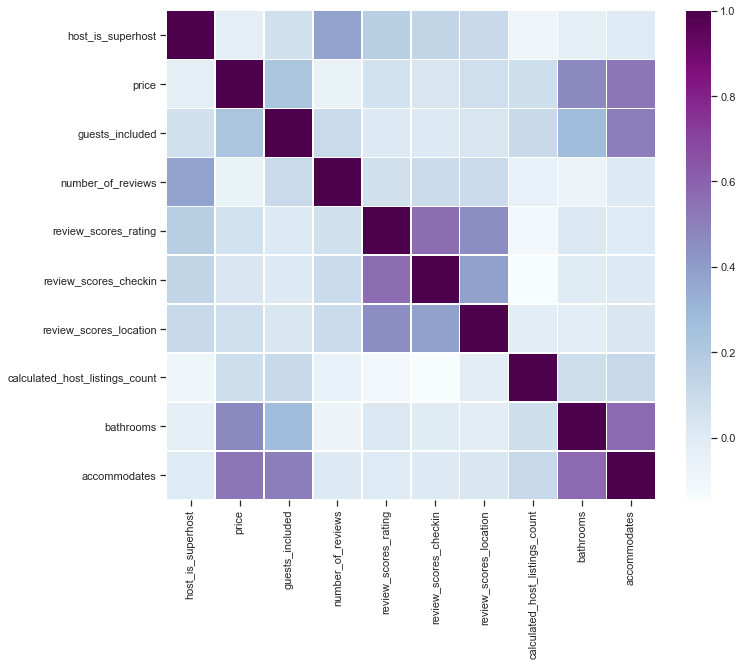

In [73]:

# Compute the correlation matrix 
corr_all = df1.corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

- it seems like review_scores_communication has a strong linear-like correlation with variable review_scores_rating and review_scores_checkin
- we can also plot the scatters for every continious variable in the dataset against each other

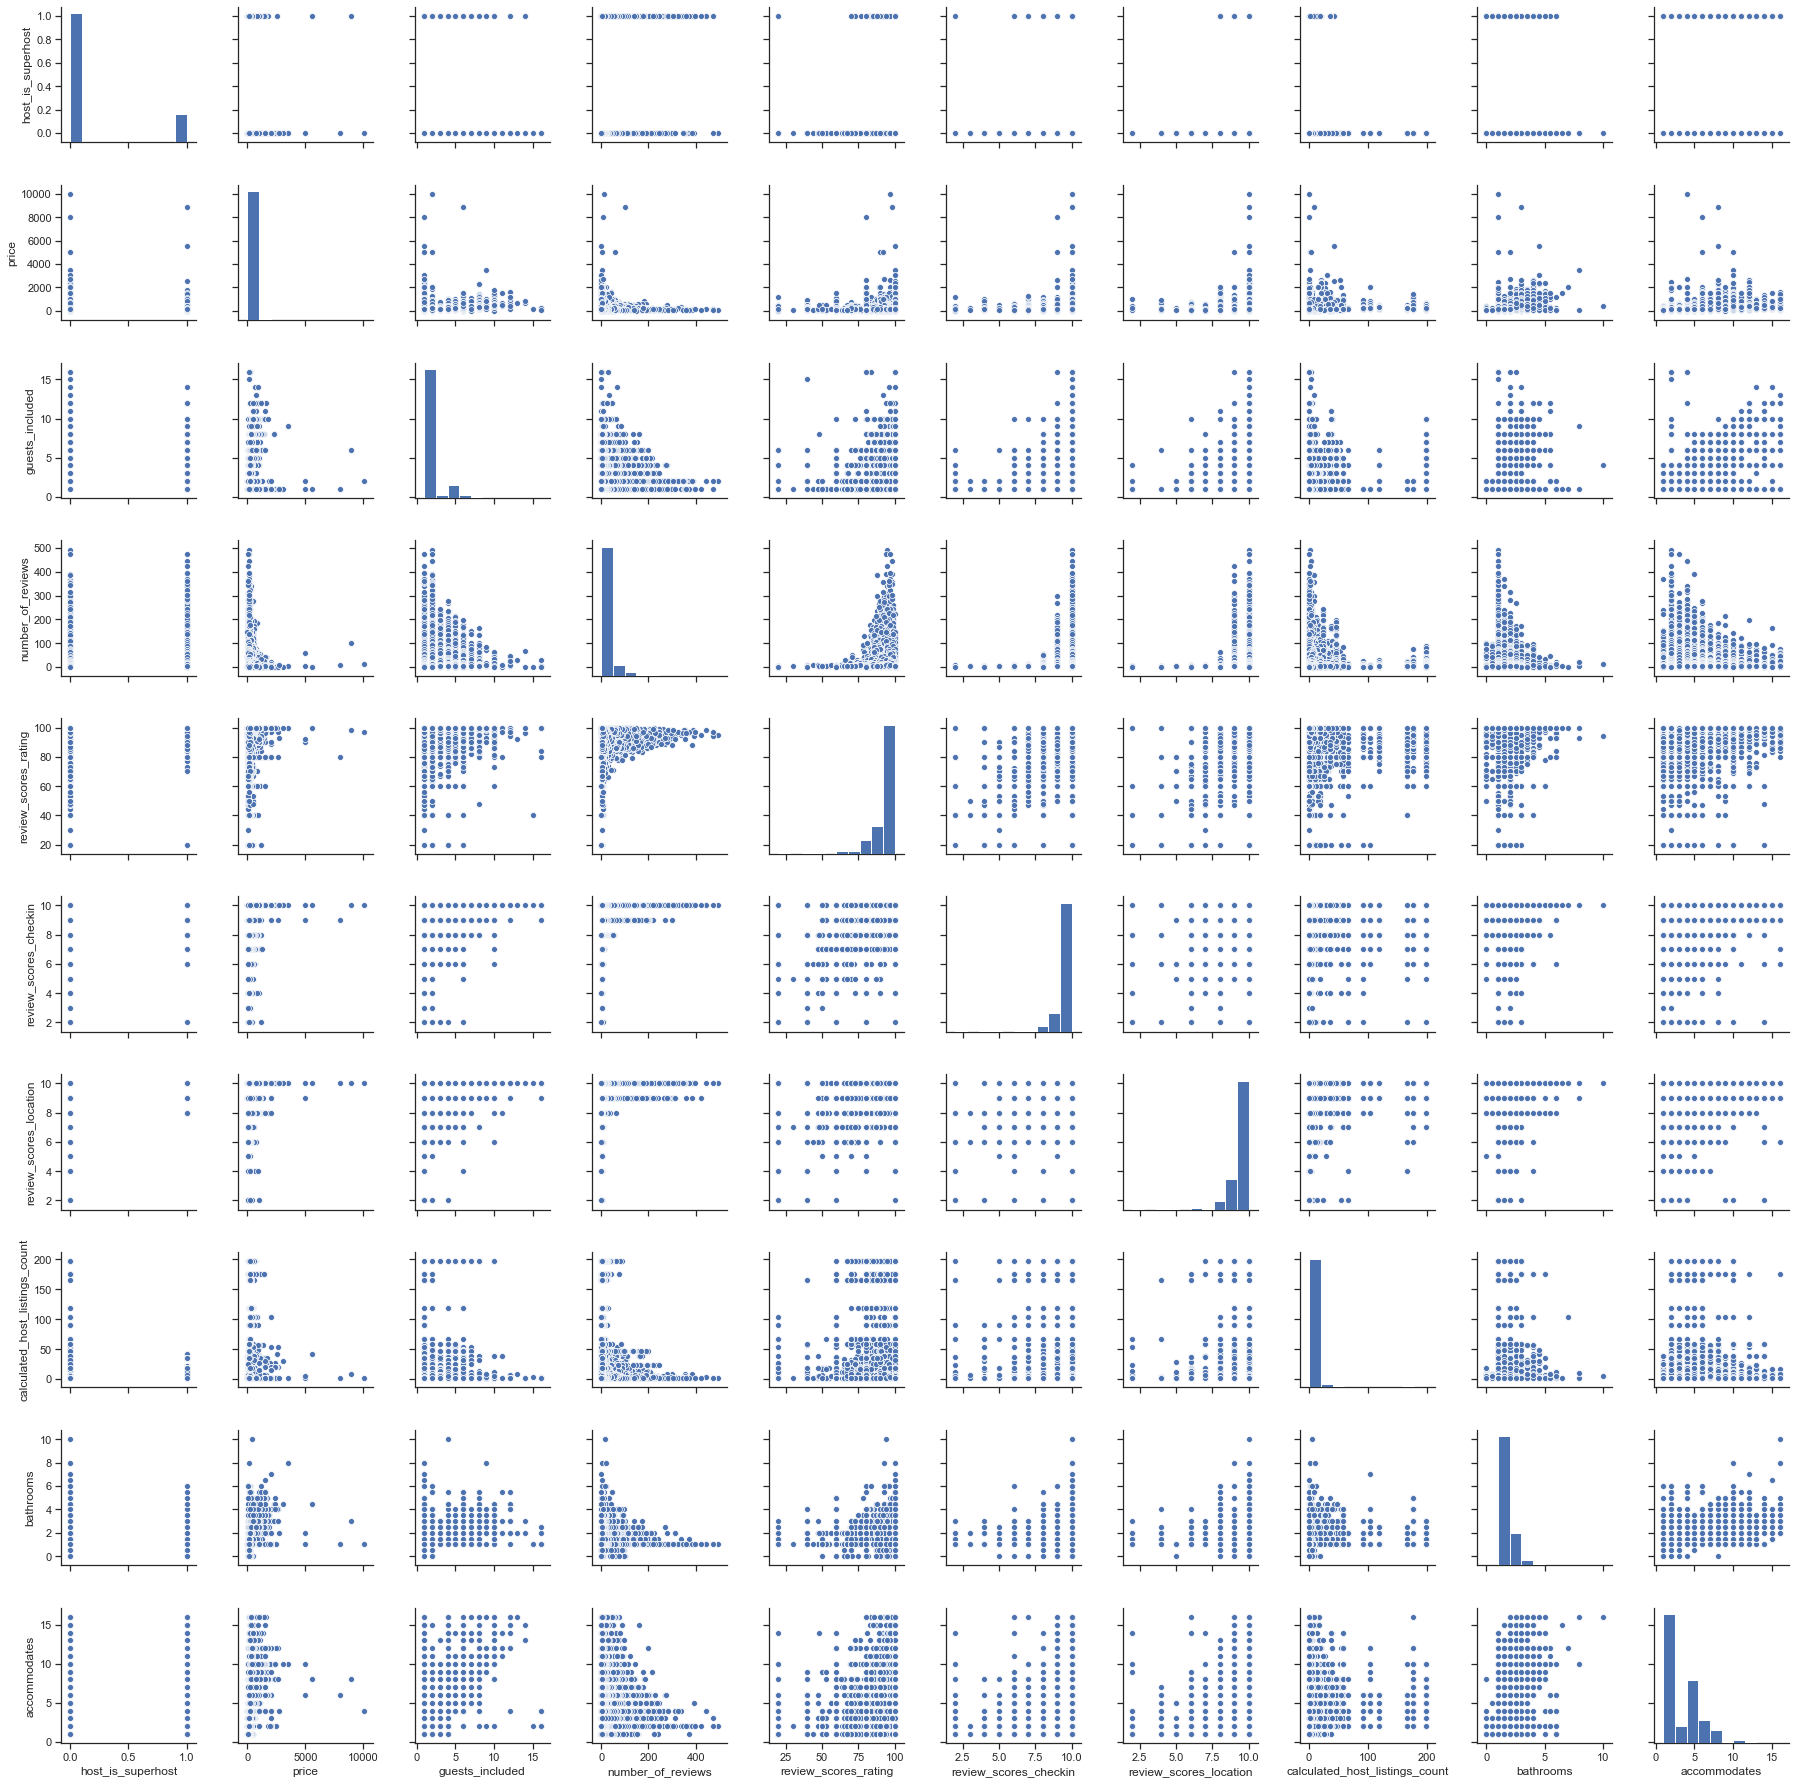

In [74]:
sns_plot = sns.pairplot(df1)
sns_plot.savefig('seaborn output.png')

- the graph above not noly reveal present trends in the dataset, but also shows the forms of each distribution. 
- out of curiously, we can take a look at the relationship between price and accommodates variable.  

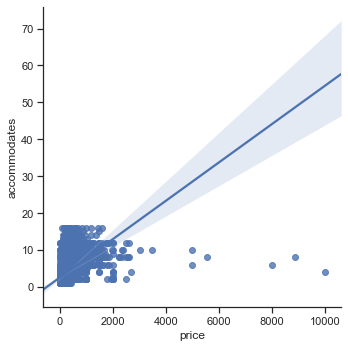

In [75]:
sns.lmplot('price','accommodates',df1, fit_reg= True)

Indeed we can see an increase in the number of accommondates of a unit is associated with a proportional increase in its price. 

In [76]:
df1.shape

(22579, 13)

In [77]:
def missingValueCheck(data):
    column_name = data.columns # get column names
    #print(column_name)
    samples = data.shape[0] # number of samples
    print(samples)
    cols = data.shape[1] 
    for i in column_name:
        count = data[i].isin(['?']).sum() # count how many missing values
        if count != 0:
            pct = float(count)/samples*100 # compute the percentage of missing values
            print(str(i)+ ': '+ "{0:.4f}%".format(pct))

In [78]:
# Missing value check for train data
missingValueCheck(df)

22644


- ['Townhouse', 'House', 'Apartment', 'Guest suite', 'Loft', 'Guesthouse', 'Villa', 'Cabin', 'Bungalow', 'Condominium', 'Bed and breakfast', 'Cottage', 'Serviced apartment', 'Camper/RV', 'Boutique hotel', 'Other', 'Campsite', 'Dome house', 'Hostel', 'Tiny house', 'Treehouse', 'Tipi', 'Tent', 'Boat', 'Train', 'Island', 'Hotel', 'Chalet', 'Farm stay', 'Resort', 'Nature lodge', 'Casa particular (Cuba)', 'Aparthotel', 'Yurt', 'Hut', 'Barn']
- ['Private room', 'Entire home/apt', 'Shared room']
- ['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch']


In [79]:
df1.replace(['Townhouse', 'House', 'Apartment', 'Guest suite', 'Loft', 'Guesthouse', 'Villa',
            'Cabin', 'Bungalow', 'Condominium', 'Bed and breakfast', 'Cottage', 
            'Serviced apartment', 'Camper/RV', 'Boutique hotel', 'Other', 
            'Campsite', 'Dome house', 'Hostel', 'Tiny house', 'Treehouse', 
            'Tipi', 'Tent', 'Boat', 'Train', 'Island', 'Hotel', 'Chalet', 
            'Farm stay', 'Resort', 'Nature lodge', 'Casa particular (Cuba)', 
            'Aparthotel', 'Yurt', 'Hut', 'Barn'],
                 ['Townhouse', 'House','Apartment','Other','Other','Other','Other','Other','Other','Other'
                 ,'Other','Other','Other','Other','Other','Other','Other','Other','Other','Other'
                 ,'Other','Other','Other','Other','Other','Other','Other','Other','Other','Other'
                 ,'Other','Other','Other','Other','Other','Other'], 
                 inplace = True)

In [80]:
# Select numerical data and standardised them
cols_norm = ['host_is_superhost', 'price', 'guests_included', 'number_of_reviews','review_scores_rating',
             'review_scores_checkin','review_scores_location','calculated_host_listings_count','bathrooms','accommodates']
df1[cols_norm] = df1[cols_norm].apply(lambda x: (x-np.mean(x))/np.std(x))


In [81]:
# Get cols that need to be converted to dummies
cols_dummy = ['property_type', 'room_type','bed_type']
# Change to dummies
dummy_features = pd.get_dummies(df1[cols_dummy])
# print(dummy_features)
# Concat dummy variables with columns kept
df1 = pd.concat([df1[cols_norm],dummy_features],axis=1)

Exclude dependent variable ( price)

In [82]:
dependent_var = df1["price"].values
df1.drop(["price"], axis=1, inplace=True)

In [83]:
pd.value_counts(pd.Series(dependent_var))/df1.shape[0]

-0.153457     0.046415
-0.380071     0.043846
 0.068625     0.037557
-0.289426     0.030161
-0.561363     0.029496
 0.304304     0.025732
-0.511508     0.024182
-0.470717     0.023960
-0.606686     0.022765
-0.339281     0.020151
-0.017488     0.019133
-0.425394     0.019089
 0.526386     0.018601
-0.538701     0.018070
-0.584024     0.017450
-0.244103     0.016431
-0.493378     0.016387
-0.452588     0.016343
-0.198780     0.016165
-0.103602     0.013730
-0.624815     0.013375
-0.266764     0.013287
-0.398200     0.013065
 0.027834     0.012401
 0.753000     0.012312
 0.163803     0.010807
 0.979614     0.009522
-0.652008     0.009478
-0.062811     0.009124
-0.176118     0.008858
                ...   
 0.635161     0.000044
 3.381726     0.000044
 7.261362     0.000044
 1.056663     0.000044
 11.313226    0.000044
 1.369391     0.000044
 2.090024     0.000044
 1.954056     0.000044
 2.207864     0.000044
 12.990172    0.000044
 39.445124    0.000044
 2.837852     0.000044
 1.188100  

In [84]:
# Convert dataframe to array type for easy handling
arr_df1 = np.array(df1)
print(arr_df1.shape)

(22579, 21)


In [85]:
arr_df1

array([[-0.46934913,  0.23843832, 13.82678985, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46934913,  3.13874748, -0.53756747, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46934913, -0.48663897,  8.19199114, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.46934913, -0.48663897, -0.47917578, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46934913, -0.48663897, -0.50837162, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46934913, -0.48663897, -0.53756747, ...,  0.        ,
         0.        ,  1.        ]])

# predictive modelling
In this section we will use Random forest algorithm. 
- reason we choose this algorithm:
* Random Forest Regressor fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting by reducing the overall variance. It is one of the most popular machine learning algorithms and widely used by the community.

Before we doing the predictive, we need to do some preprocess work on the data first. 
- If a feature has a variance that is much larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. That is why we need to scale the data first.

Notice we have some variables whose type is not int or float. 
In order to use categorical variables in the model fitting we need to encode them into dummies.
* we can not just give these variables a score to show which is better than which, because this method is too optional. 

In this section, we split the dataset into train and test part. This method can reduce the validation error.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(arr_df1, dependent_var, 
                                                    test_size = 0.2,
                                                    random_state = 123)
print("X_Train", X_train.shape, "and X_test", X_test.shape)
print("y_Train", y_train.shape, "and y_test", y_test.shape)

X_Train (18063, 21) and X_test (4516, 21)
y_Train (18063,) and y_test (4516,)


In [87]:
y_train = y_train.ravel()
y_train = y_train.astype(int)

## Random Forest Regressor
- n_estimators: the number of trees to build before taking the maximum voting or averages of predictions. Higher number of trees gives better performance. In this case we take n_estimators = 300.
- max_features: the number of features to consider when looking for the best split. We already now that the percentage of relevant features is between 10-40%, so we take this range.
- min_samples_leaf : the minimum sample leaf size is highly dependent on the sample size. We will leave it at the default value of 2.
- max_depth: the maximum depth of the tree also depends on the sample size. More data - bigger the depth. Here, in the contrary, we have quite a big dataset so the range between 5 and 20 with a step of 1 will be enough.

 1) accommodates                   0.195230
 2) number_of_reviews              0.188682
 3) bathrooms                      0.155267
 4) calculated_host_listings_count 0.105421
 5) review_scores_rating           0.101828
 6) guests_included                0.085477
 7) review_scores_location         0.032558
 8) property_type_House            0.026652
 9) review_scores_checkin          0.022745
10) property_type_Apartment        0.022384
11) room_type_Entire home/apt      0.019762
12) host_is_superhost              0.019308
13) room_type_Private room         0.008800
14) property_type_Other            0.007832
15) property_type_Townhouse        0.006052
16) bed_type_Futon                 0.000496
17) bed_type_Real Bed              0.000479
18) room_type_Shared room          0.000388
19) bed_type_Airbed                0.000334
20) bed_type_Couch                 0.000238
21) bed_type_Pull-out Sofa         0.000067


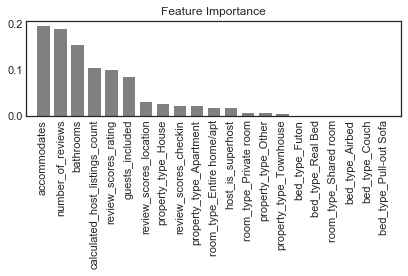

In [88]:
from sklearn.ensemble import RandomForestClassifier
# Code Adapted from: Raschka, S. (2016).Python machine learning. PacktPublishing Ltd.

clf = RandomForestClassifier()
col_names = df1.columns.values

# print(col_names)

# Train random forest classifier
forest = clf.fit(X_train, y_train)

# Print the name and gini importance of each feature in decreasing order
importance = forest.feature_importances_
idx = np.argsort(importance)[::-1]
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i+1,30,col_names[idx[i]],importance[idx[i]]))
    
# Plot feature importance in decreasing order
plt.style.use('seaborn-white')
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importance[idx],color='grey',align='center')
plt.xticks(range(X_train.shape[1]), col_names[idx], rotation=90) # labels on x-axis
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.savefig('feature.png',format = 'png' )
plt.show()
plt.close()

select top 6 key features  
-  accommodates                   0.187295
-  number_of_reviews              0.181722
-  bathrooms                      0.169329
-  calculated_host_listings_count 0.100282
-  review_scores_rating           0.099128
-  guests_included                0.082216

In [89]:
new_df = df[['accommodates','number_of_reviews','bathrooms','calculated_host_listings_count'
            ,'review_scores_rating','guests_included']]

In [90]:
new_df.isnull().sum()


accommodates                      0
number_of_reviews                 0
bathrooms                         6
calculated_host_listings_count    0
review_scores_rating              4
guests_included                   0
dtype: int64

In [91]:
new_df = new_df.dropna(subset = ['bathrooms','review_scores_rating'])

In [92]:
from pandas import DataFrame
import sklearn.metrics as metrics
from sklearn import mixture 
import warnings
warnings.filterwarnings('ignore')

In [93]:
new_df.sample(10)

accommodates  number_of_reviews  bathrooms  \
3945              2                 44        1.0   
21452             2                  3        2.0   
4616              4                  2        1.0   
16491             1                 18        2.0   
10458             5                 11        1.0   
3800              4                117        1.0   
1640              2                  3        1.0   
7193             16                 20        8.0   
6621              2                  2        2.0   
21281             2                 10        1.0   

       calculated_host_listings_count  review_scores_rating  guests_included  
3945                                2                  99.0                1  
21452                               1                  80.0                1  
4616                                1                  20.0                4  
16491                              13                  78.0                1  
10458                               1                  90.0                3  
3800                                1                  96.0                2  
1640                                1                  87.0                1  
7193                               10                  93.0                1  
6621                                2                  90.0                1  
21281                               1                  92.0                1

In [94]:
new_df = pd.concat([new_df,df['room_type']],axis=1)

In [95]:
new_df.isnull().sum()

accommodates                      10
number_of_reviews                 10
bathrooms                         10
calculated_host_listings_count    10
review_scores_rating              10
guests_included                   10
room_type                          0
dtype: int64

In [96]:
new_df = new_df.dropna(subset = ['accommodates','number_of_reviews','guests_included',
                                 'calculated_host_listings_count','bathrooms','review_scores_rating'])

In [97]:
new_df.isnull().sum()


accommodates                      0
number_of_reviews                 0
bathrooms                         0
calculated_host_listings_count    0
review_scores_rating              0
guests_included                   0
room_type                         0
dtype: int64

In [98]:
new_df.sample(10)

accommodates  number_of_reviews  bathrooms  \
9362            2.0                3.0        1.0   
19977           5.0                2.0        1.0   
8404            3.0               21.0        1.0   
9039           10.0               28.0        3.0   
5423            3.0               42.0        1.0   
3081            4.0                4.0        2.0   
21425           8.0                4.0        3.5   
10778           2.0                1.0        1.0   
15004           2.0               48.0        1.0   
7121            4.0               12.0        2.0   

       calculated_host_listings_count  review_scores_rating  guests_included  \
9362                              1.0                 100.0              1.0   
19977                             1.0                 100.0              1.0   
8404                              2.0                  97.0              1.0   
9039                              1.0                  98.0              8.0   
5423                              2.0                  95.0              2.0   
3081                              1.0                  87.0              1.0   
21425                             1.0                 100.0              2.0   
10778                             8.0                  60.0              1.0   
15004                             2.0                  97.0              1.0   
7121                             32.0                 100.0              1.0   

             room_type  
9362   Entire home/apt  
19977  Entire home/apt  
8404   Entire home/apt  
9039   Entire home/apt  
5423   Entire home/apt  
3081   Entire home/apt  
21425  Entire home/apt  
10778     Private room  
15004     Private room  
7121   Entire home/apt

In [99]:
# split data into features and labels

x = new_df.iloc[:, 0:5]
y = new_df.iloc[:, -1]
print(x.sample(5))
print('############################')
print(y.sample(5))

       accommodates  number_of_reviews  bathrooms  \
19505           8.0                7.0        2.0   
14369           2.0                3.0        1.0   
13719           2.0                2.0        1.0   
16408           1.0                1.0        1.0   
7861            2.0               85.0        1.0   

       calculated_host_listings_count  review_scores_rating  
19505                            11.0                  63.0  
14369                            54.0                  93.0  
13719                             1.0                 100.0  
16408                             2.0                 100.0  
7861                              2.0                  99.0  
############################
3965     Entire home/apt
10740    Entire home/apt
4812        Private room
12062    Entire home/apt
11754    Entire home/apt
Name: room_type, dtype: object


# Visualize Data

In [100]:
new_df['room_type'].value_counts()

Entire home/apt    14826
Private room        7551
Shared room          257
Name: room_type, dtype: int64

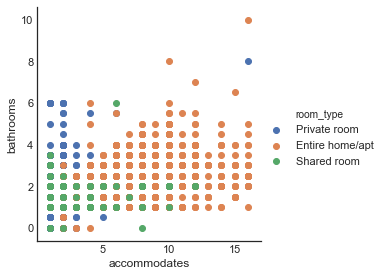

In [101]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(new_df, hue="room_type", size=4) \
   .map(plt.scatter, "accommodates", "bathrooms") \
   .add_legend();

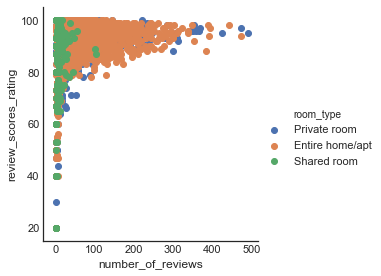

In [102]:
sns.FacetGrid(new_df, hue="room_type", size=4) \
   .map(plt.scatter, "number_of_reviews", "review_scores_rating") \
   .add_legend();

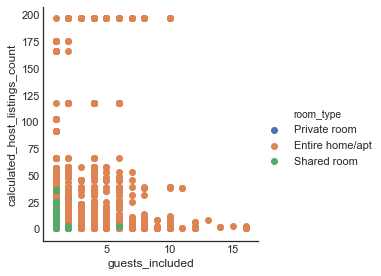

In [103]:
sns.FacetGrid(new_df, hue="room_type", size=4) \
   .map(plt.scatter, "guests_included", "calculated_host_listings_count") \
   .add_legend();

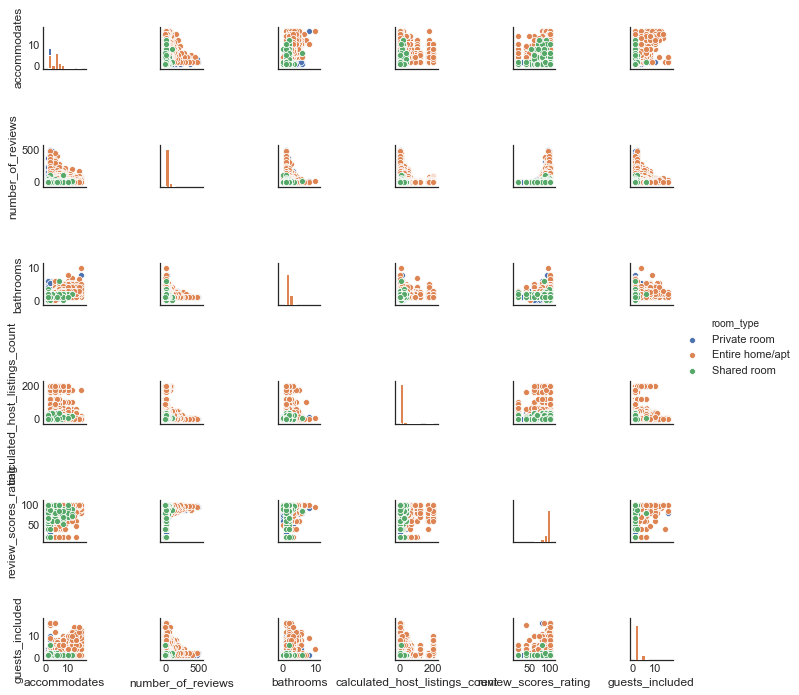

In [106]:
sns.pairplot(new_df, hue="room_type", diag_kind="hist", size=1.6);
sns_plot.savefig('seaborn output_1.png')

- feature scaling

In [111]:
# the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(x)
x_scaled_array = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled_array, columns = x.columns)

x_scaled.sample(5)

accommodates  number_of_reviews  bathrooms  \
4470      -0.664557           0.952782  -0.520740   
12638      1.191741           1.741522   1.109809   
8028       0.263592          -0.420210  -0.520740   
9531       0.263592          -0.537060  -0.520740   
8727       1.191741          -0.390998   1.925083   

       calculated_host_listings_count  review_scores_rating  
4470                        -0.247055              0.474872  
12638                        1.583417             -0.467958  
8028                        -0.247055              0.160596  
9531                        -0.247055              0.684390  
8727                        -0.206378              0.684390

In [146]:
from sklearn.mixture import GaussianMixture
nclusters = 3
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(x_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(x_scaled)
y_cluster_gmm

array([1, 0, 1, ..., 1, 2, 2])

In [162]:
# mash the data down into 2 dimensions

from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=0)
pca.fit(x_scaled)
X_pca_array = pca.transform(x_scaled)
print(X_pca_array)
X_pca = pd.DataFrame(X_pca_array, columns=['first PC','second PC']) # PC=principal component
X_pca.sample(5)

[[-2.19419894 -6.53940574]
 [ 2.69098064 -0.81438023]
 [-1.63717177 -3.39725561]
 ...
 [-1.15327871 -0.16214955]
 [ 1.39472112 -0.23039245]
 [-0.66786167  5.56977571]]


first PC  second PC
18129 -0.802332  -0.133610
15553 -0.514136  -0.026725
22628 -0.788944   1.244225
9269  -0.829304  -0.197625
5448  -0.837315  -0.049677

In [163]:
pd.Categorical(new_df['room_type'])

[Private room, Entire home/apt, Private room, Entire home/apt, Private room, ..., Entire home/apt, Entire home/apt, Private room, Entire home/apt, Entire home/apt]
Length: 22634
Categories (3, object): [Entire home/apt, Private room, Shared room]

In [164]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans


km = KMeans(n_clusters=nclusters, random_state=0)
km.fit(x_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x_scaled)
y_cluster_kmeans

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [165]:
# so that gives us new 2d coordinates for each data point.

# at this point, if you don't have labelled data,
# you can add the k-means cluster ids to this table and make a
# colored scatterplot. 

# we do actually have labels for the data points, but let's imagine
# we don't, and use the predicted labels to see what the predictions look like.

# first, convert species to an arbitrary number
y_id_array = pd.Categorical(new_df['room_type'])
y_id_array = y_id_array.codes

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['room_type'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

first PC  second PC  ClusterKmeans  room_type
17990 -0.802823   0.322368              1          1
19212 -0.851499  -0.287843              1          0
9878   0.973930   1.474693              1          0
6405  -1.147653  -0.134818              1          0
14451  0.926343  -0.516672              0          1

In [166]:
import matplotlib as mpl
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    fig, ax = plt.subplots(figsize = (12,9))
    # color map
    cmap = mpl.cm.get_cmap('prism')
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'first PC', y = 'second PC',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Dataset");

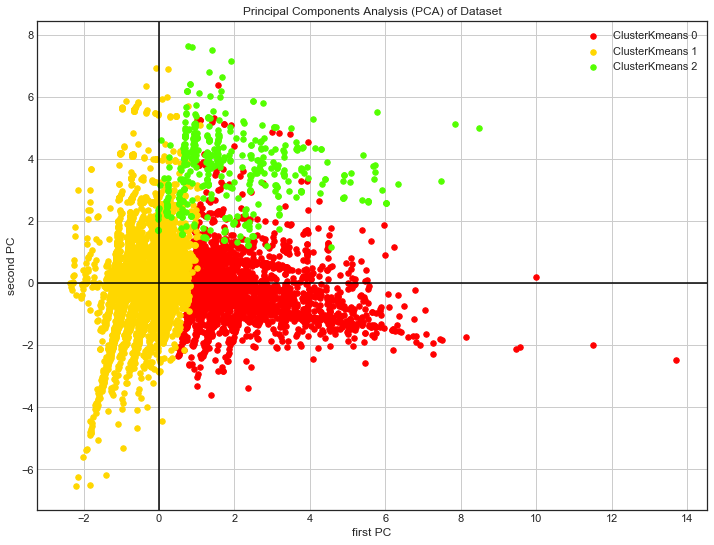

In [167]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')

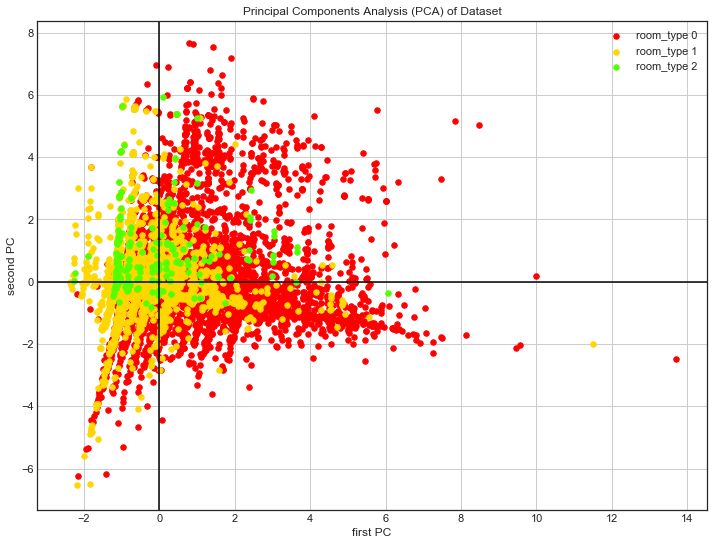

In [168]:
# so those are the *predicted* labels - what about the *actual* labels?
plotData(df_plot, 'room_type')

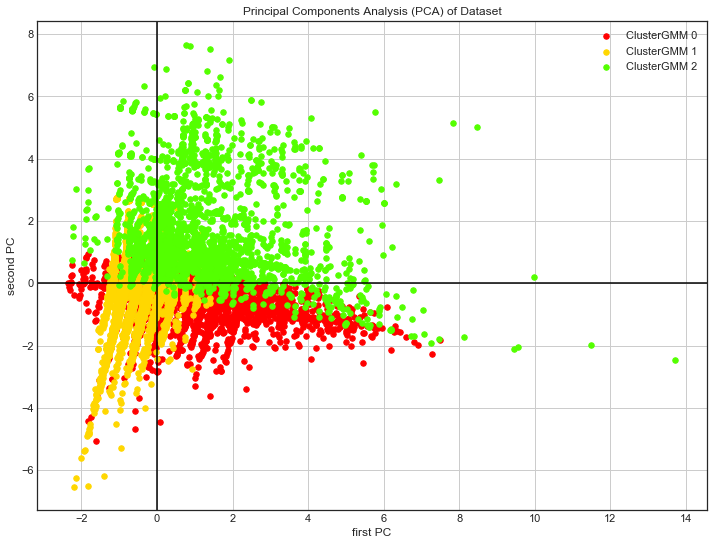

In [169]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [172]:
from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score = adjusted_rand_score(y, y_cluster_gmm)
score

-0.01943868302575771